**Setup**

앞 장에서 신경망 학습에 대한 코드를 구현했다.

이 때, 신경망의 가중치 매개변수의 기울기(정확히는 손실 함수의 기울기)는 수치 미분을 사용했다.
- 단순하고 구현하기도 쉽지만 시간이 오래 걸린다는 단점이 있음 
> 가중치 매개변수의 기울기를 효율적으로 계산하는 오차역전파법(Backpropagation)에 대해 정리


**출처**

https://fliphtml5.com/qvagj/edfm/basic

# 계산 그래프

**계산 그래프**는 계산 과정을 그래프로 나타낸 것이다. 
- 복수의 노드와 엣지(노드와 노드 사이의 직선)로 표현

## 계산 그래프 예제

### 예제 1
- 현빈 군은 슈퍼에서 1개에 100원인 사과를 2개 샀습니다. 이 때 지불 금액을 구하세요. 단 소비세가 10% 부과됩니다.

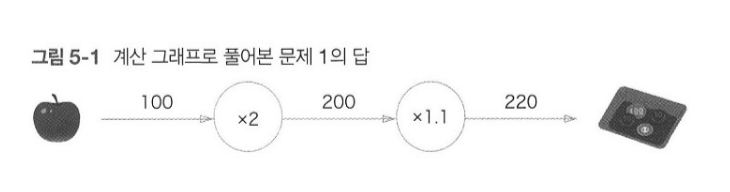

- 처음에 사과의 100원이 '$\times2$' 노드로 흐르고, 200원이 되어 다음 노드로 전달
- 200원이 '$\times1.1$' 노드를 거쳐 220원이 된다.
> 220원 출력

'$\times2$', '$\times1.1$' 자체를 하나의 연산으로 생각할 수도 있지만, '$\times$' 만을 하나의 연산이라고 가정했을 때는 사과의 개수와 소비세가 변수가 되어 원 밖에 표기

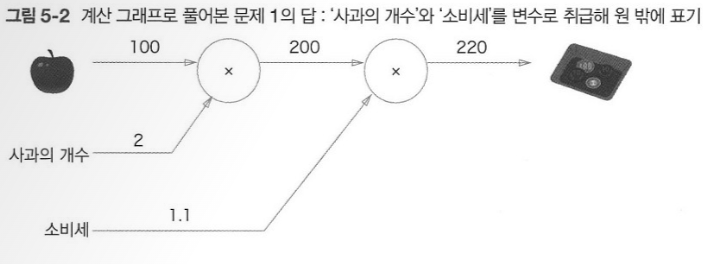

### 예제 2
- 현빈 군은 슈퍼에서 사과를 2개, 귤을 3개 샀습니다. 사과는 1개에 100원, 귤은 1개에 150원입니다. 소비세가 10%일 때 지불 금액을 구하세요.

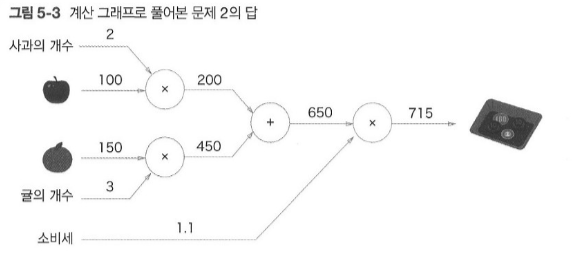

덧셈 노드인 '$+$'가 새로 등장하여 사과와 귤의 금액을 합산한다. 

### 요약
계산 그래프를 활용한 문제 풀이는 다음의 흐름으로 진행 
- 1. 계산 그래프를 구성
- 2. 그래프에서 계산을 왼쪽에서 오른쪽으로 진행

계산을 왼쪽에서 오른쪽으로 진행하는 단계를 **순전파**라고 한다. 
> 이것의 반대 과정을 역전파라고 한다. 이후에 미분을 계산할 때 중요한 역할을 한다.

## 국소적 계산

계산 그래프의 특징은 '국소적 계산'을 전파함으로써 최종 결과를 얻는다는 점에 있다.

국소적 계산은 결국 전체에서 어떤 일이 벌어지든 관계없이 자신과 관계된 정보만으로 결과를 출력할 수 있다는 의미

ex. 여러 식품을 구입하는 복잡한 계산을 거쳐 4,000원이라는 총 금액을 얻었고, 이 과정이 어떻게 진행되었는지는 상관없이 사과 2개의 가격인 200원을 더하기만 하면 된다.
> 즉, 사과 노드는 앞의 복잡한 계산은 신경쓸 필요가 없음 

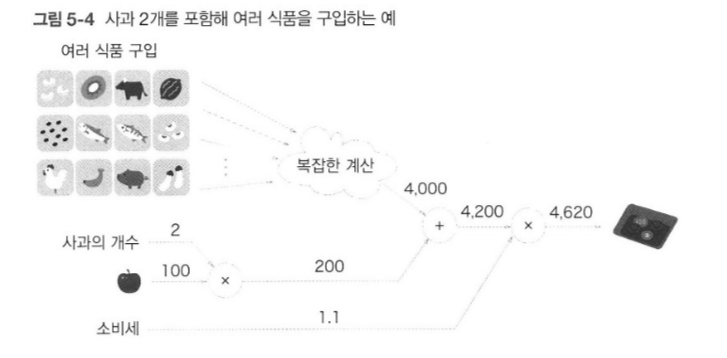

## 그래서, 왜 계산 그래프를 이용하는가?

- 1. 국소적 계산이 가능하다. 
    - 전체가 아무리 복잡한 구조로 이루어졌든, 각 노드에서는 단순한 계산만을 수행하게 됨. 따라서 문제가 단순해진다.
    
- 2. 중간 계산 결과를 모두 보관할 수 있다. 
    - 사과 2개까지 계산했을 때는 200원이라는 정보를 보관
    
- **3. 역전파를 통해 미분을 효율적으로 계산할 수 있다.** 

### 역전파를 통해 미분을 계산한다는 것의 의미

문제 1에서 사과 가격이 오르면 최종 금액에 어떤 영향을 미치는지 알고 싶다고 가정 
> 사과 가격에 대한 지불 금액의 미분을 구하는 문제에 해당한다.

사과 값을 $x$, 지불 금액을 $L$이라고 했을 때 $\dfrac{\partial{L}}{\partial{x}}$을 구하는 것과 동일한 문제가 된다.
> 사과 값이 '아주 조금' 올랐을 때 지불 금액이 얼마나 증가하느냐를 표시한 것이다. 

'사과 가격에 대한 지불 금액의 미분'값은 계산 그래프에서 역전파를 수행하면 구할 수 있다.

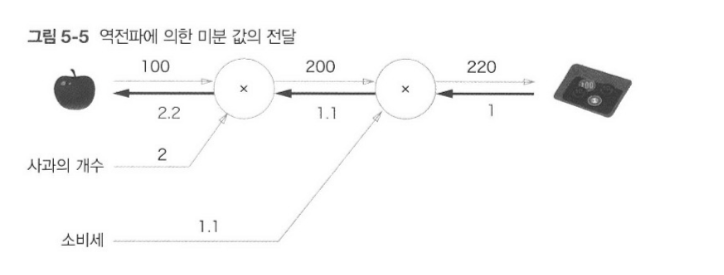

역전파는 오른쪽에서 왼쪽으로 '1$\rightarrow{}$1.1$\rightarrow{}$2.2'순으로 미분 값을 전달한다.

즉, 사과 가격에 대한 지불 금액의 미분은 2.2라고 할 수 있다.

# 연쇄법칙

순전파는 왼쪽에서 오른쪽으로 진행되지만, 역전파는 오른쪽에서 왼쪽으로 진행된다. 

이 국소적 미분을 전달하는 원리는 **연쇄법칙**에 의한 것이다. 

## 계산 그래프의 역전파

$y=f(x)$의 역전파를 계산 그래프로 표시

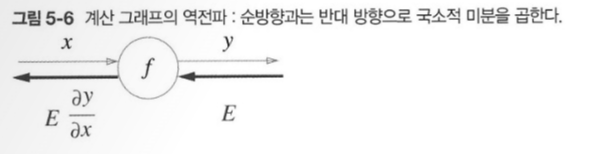

역전파의 계산 절차는 신호 $E$에 노드의 국소적 미분($\dfrac{\partial{y}}{\partial{x}}$)을 곱한 후 다음 노드로 전달하는 것이다. 

여기서 국소적 미분은 순전파 때의 $y=f(x)$ 계산의 미분을 구한다는 것이며, 이는 $x$에 대한 $y$의 미분($\dfrac{\partial{y}}{\partial{x}}$)을 구한다는 것이다. 

$y = f(x) = x^2$라면 $\dfrac{\partial{y}}{\partial{x}}=2x$가 된다. 

그리고 이 국소적 미분을 상류에서 전달된 값(여기서는 $E$)에 곱해 앞쪽 노드로 전달하는 것이다. 

## 연쇄법칙이란?

**합성 함수**를 고려

$z=(x+y)^2$는 다음의 두 개의 식으로 구성된다. 

$$z=t^2$$\
$$t=x+y$$

$$
\frac{\partial z}{\partial x}=\frac{\partial z}{\partial t} \frac{\partial t}{\partial x}=2 t \cdot 1=2(x+y)
$$